# Twitter data classification
## Load libraries

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
#from wordcloud import WordCloud
from math import log, sqrt
import nltk
nltk.download('words')
nltk.download('stopwords')
import pandas as pd
import nltk
#from bs4 import BeautifulSoup
import numpy as np
import re
#import preprocessor as p
%matplotlib inline

In [2]:
#Global varaible declaration
n_features_selected=5000

In [3]:
df=pd.read_csv("train.csv")
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


## Show distribution of two labels

In [11]:
df.describe()
sums

target
0    4342
1    3271
Name: target, dtype: int64

# Plot label distribution

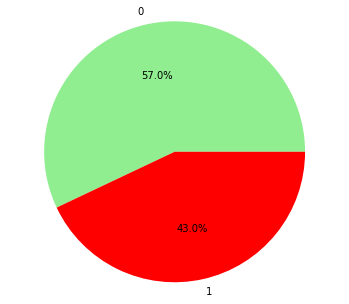

In [6]:
import matplotlib.pyplot as plt
sums = df.target.groupby(df.target).count()

#df.High_Risk_Cancer=df.High_Risk_Cancer.astype('int64')
#sums = df.High_Risk_Cancer.groupby(df.High_Risk_Cancer).count()
plt.axis('equal');
plt.pie(sums,radius=1.5, labels=['0','1'],autopct='%1.1f%%',colors = ['lightgreen', 'red']);
plt.show()

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
'''
my_sent = "#Natural Language Processing is not fun but % challenging."
tokens = word_tokenize(my_sent)

filtered_sentence = [w for w in tokens if not w in stopwords.words()]

print(filtered_sentence)
new_sent=' '.join(filtered_sentence)
new_sent
'''

'\nmy_sent = "#Natural Language Processing is not fun but % challenging."\ntokens = word_tokenize(my_sent)\n\nfiltered_sentence = [w for w in tokens if not w in stopwords.words()]\n\nprint(filtered_sentence)\nnew_sent=\' \'.join(filtered_sentence)\nnew_sent\n'

In [102]:
def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]','',x)
    
    return x
text = "#It's a nice day[]"
print(remove_punctuation_re(text))

Its a nice day


## Replace all NaN values with empty string

In [9]:
df.replace(np.NaN, ' ', inplace=True)
#df['location'] + ' ' + df['keyword']
#txts=df['keyword'] + ' ' + df['location'] + ' ' + df['text']
#txts

In [104]:
#processing takes long so saved in csv files after processing

nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

txts=df['text'] + ' ' + df['location'] + ' ' + df['keyword']
corpus=[]
for txt in txts:
    txt1=remove_punctuation_re(txt)
    tokens= word_tokenize(txt1)
    txt2 = [lemmatizer.lemmatize(w.lower()) for w in tokens if not w in stopwords.words()]
    new_sent=' '.join(txt2)
    corpus.append(new_sent)
print(corpus)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\syedm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['our deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'all resident asked shelter place notified officer no evacuation shelter place order expected', '13000 people receive wildfire evacuation order california', 'just got sent photo ruby alaska smoke wildfire pours school', 'rockyfire update california hwy 20 closed direction due lake county fire cafire wildfire', 'flood disaster heavy rain cause flash flooding street manitou colorado spring area', 'im top hill i see fire wood', 'there emergency evacuation happening building across street', 'im afraid tornado coming area', 'three people died heat wave far', 'haha south tampa getting flooded hah wait a second i live in south tampa what am i gon na do what am i gon na do fvck flooding', 'raining flooding florida tampabay tampa 18 19 day ive lost count', 'flood bago myanmar we arrived bago', 'damage school bus 80 car crash breaking', 'whats', 'i love fruit', 'summer lovely', 'my car fast', 'what gooooo

In [96]:
labels=['text']
df_new = pd.DataFrame(corpus, columns=labels)
df_new['target']=df['target']
print(df_new.tail(33))
df_new.to_csv('train_new.csv')

                                                   text  target
7580  fx forex trading cramer igers 3 word wrecked d...       0
7581  engineshed great atmosphere british lion gig t...       0
7582  cramer igers 3 word wrecked disney stock cnbc ...       0
7583  pic 16yr old pkk suicide bomber detonated bomb...       1
7584  these box ready explode exploding kitten final...       0
7585  calgary police flood road closure calgary http...       1
7586  sismo detectado japì_n 154107 seismic intensit...       1
7587                                   siren everywhere       0
7588  breaking isi claim responsibility mosque attac...       1
7589                                     omg earthquake       1
7590  severe weather bulletin no 5 for typhoon ûïhan...       1
7591  heat wave warning aa ayyo just i plan visit fr...       1
7592  an is group suicide bomber detonated explosive...       1
7593     i heard really loud bang everyone asleep great       0
7594  a gas thing exploded i heard screa

## Read processed data from csv file to save time

In [97]:

df1=pd.read_csv("train_new.csv")
df1
df=df1
corpus=[]
#corpus=[cc.append(s) for s in df['text'] ]
for txt in df['text']:
    corpus.append(txt)
corpus

['our deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada',
 'all resident asked shelter place notified officer no evacuation shelter place order expected',
 '13000 people receive wildfire evacuation order california',
 'just got sent photo ruby alaska smoke wildfire pours school',
 'rockyfire update california hwy 20 closed direction due lake county fire cafire wildfire',
 'flood disaster heavy rain cause flash flooding street manitou colorado spring area',
 'im top hill i see fire wood',
 'there emergency evacuation happening building across street',
 'im afraid tornado coming area',
 'three people died heat wave far',
 'haha south tampa getting flooded hah wait a second i live in south tampa what am i gon na do what am i gon na do fvck flooding',
 'raining flooding florida tampabay tampa 18 19 day ive lost count',
 'flood bago myanmar we arrived bago',
 'damage school bus 80 car crash breaking',
 'whats',
 'i love fruit',
 'summer lovely',
 'my car f

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())
print(X.shape)


(7613, 24554)


In [58]:
features=vectorizer.get_feature_names()
#print(features)
len(features)

24554

In [59]:
type(X[1]), len(features)

(scipy.sparse.csr.csr_matrix, 24554)

In [60]:
Y=df_new['target']
Y.shape

(7613,)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

## Test to select best features

In [62]:
from sklearn.feature_selection import SelectKBest, chi2
import sys
from time import time
t0 = time()
feature_names = vectorizer.get_feature_names()
#choose top k features
ch2 = SelectKBest(chi2, k=n_features_selected)
X_train = ch2.fit_transform(X_train, y_train)
X_test = ch2.transform(X_test)
if feature_names:
    # keep selected feature names
    feature_names = [feature_names[i] for i
                     in ch2.get_support(indices=True)]
print("done in %fs" % (time() - t0))
print()

if feature_names:
    feature_names = np.asarray(feature_names)


done in 0.117685s



In [63]:
X_train1=pd.SparseDataFrame(X_train, columns=feature_names)
X_train, X_test=pd.SparseDataFrame(X_train, columns=feature_names),pd.SparseDataFrame(X_test, columns=feature_names)
X_train.head()
#X=pd.SparseDataFrame(X, columns=feature_names)

,001116,0104,010401,0111,015025,02,05,063243,075,080215,...,ûpolitics,ûª93,ûêûêûê,ûïbbcwomanshour,ûïhannaphû,ûïhatchet,ûïrichmond,ûïwe,ûïwhen,ûókody
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.227195,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Replace NaN values with 0

In [64]:
X_train, X_test=X_train.fillna(0),X_test.fillna(0)
X_train.head()

,001116,0104,010401,0111,015025,02,05,063243,075,080215,...,ûpolitics,ûª93,ûêûêûê,ûïbbcwomanshour,ûïhannaphû,ûïhatchet,ûïrichmond,ûïwe,ûïwhen,ûókody
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.227195,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Use Naive-Bayes and TfIdf

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

model=MultinomialNB()

model.fit(X_train,y_train)
preds=model.predict(X_test)

acc=np.sum(preds==y_test)/len(preds)
print('Accuracy:',acc)


Accuracy: 0.793827971109652


In [66]:
X_train.shape

(6090, 5000)

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=700, max_depth=1, random_state=1)

#X=XV
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

model=RandomForestClassifier(n_estimators=200, max_depth=25, random_state=1)

model.fit(X_train,y_train)
preds=model.predict(X_test)

acc=np.sum(preds==y_test)/len(preds)
print('Accuracy using Random Forest:',acc)

Accuracy using Random Forest: 0.7156927117531189


# AdaBoost

In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model=AdaBoostClassifier( DecisionTreeClassifier(max_depth=1),
    n_estimators=800)



#X=XV
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
model_ada = AdaBoostClassifier(n_estimators=100, random_state=0)

model_ada.fit(X_train,y_train)

model_ada.fit(X_train,y_train)
preds=model_ada.predict(X_test)

acc=np.sum(preds==y_test)/len(preds)
print('Accuracy using AdaBoost:',acc)

Accuracy using AdaBoost: 0.7596848325673013


# SVM

In [69]:
from sklearn.svm import LinearSVC

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

model=LinearSVC()

model.fit(X_train,y_train)
preds=model.predict(X_test)

acc=np.sum(preds==y_test)/len(preds)
print('Accuracy:',acc)

Accuracy: 0.7977675640183848


# KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(X_train, y_train)
preds=model_KNN.predict(X_test)

acc=np.sum(preds==y_test)/len(preds)
print('Accuracy:',acc)

Accuracy: 0.7091267235718975


In [71]:
feature_names
print(X_train.shape, X_test.shape)
X_train.head()

(6090, 5000) (1523, 5000)


,001116,0104,010401,0111,015025,02,05,063243,075,080215,...,ûpolitics,ûª93,ûêûêûê,ûïbbcwomanshour,ûïhannaphû,ûïhatchet,ûïrichmond,ûïwe,ûïwhen,ûókody
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.227195,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Test Temp

In [ ]:
'''
txts=df['text'] + ' ' + df['location'] + ' ' + df['keyword']
corpus=[]
for txt in txts:
    txt1=remove_punctuation_re(txt)
    tokens= word_tokenize(txt1)
    txt2 = [w.lower() for w in tokens if not w in stopwords.words()]
    new_sent=' '.join(txt2)
    corpus.append(new_sent)
print(corpus)
'''

In [7]:
'''
text1=[remove_punctuation_re(t) for t in txts]
text2= [w.lower() for w in text1 if not w in stopwords.words()]
text3=[word_tokenize(w) for w in text2]
new_sent=[[' '.join(w) for w in text if not w in stopwords.words()] for text in text3]
#hs = [[h() for i in range(8)] for j in range(8)]
#[word_tokenize(t) for t in sent_tokenize(s)]
print(new_sent)
text3
'''

"\ntext1=[remove_punctuation_re(t) for t in txts]\ntext2= [w.lower() for w in text1 if not w in stopwords.words()]\ntext3=[word_tokenize(w) for w in text2]\nnew_sent=[[' '.join(w) for w in text if not w in stopwords.words()] for text in text3]\n#hs = [[h() for i in range(8)] for j in range(8)]\n#[word_tokenize(t) for t in sent_tokenize(s)]\nprint(new_sent)\ntext3\n"